# Building dashboards with streamlit

In [1]:
# Import Required Libraries

import streamlit as st
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import os
from plotly.subplots import make_subplots
from datetime import datetime as dt
from streamlit_keplergl import keplergl_static

### Wrangle data

In [2]:
# Assigning Path

path = r'/Users/elia/Desktop/New_York_City_Bike'

In [3]:
# Define specific data types to enforce when loading these columns

dtype_spec = {
    "start_station_id": "string",
    "end_station_id": "string",}

In [4]:
# Import CitiBike DataSet as a DataFrame

df = pd.read_csv(os.path.join(path, 'CB_Data', 'Prepared Data', 'ny_citybike_V2.csv'), dtype=dtype_spec)

In [5]:
# Display the data type of each column in the dataframe

df.dtypes

Unnamed: 0                     int64
ride_id                       object
bicycle_type                  object
rent_start_time               object
rent_end_time                 object
start_station_name            object
start_station_id      string[python]
end_station_name              object
end_station_id        string[python]
start_latitude               float64
start_longitude              float64
end_latitude                 float64
end_longitude                float64
customer_type                 object
trip_duration                  int64
date                          object
avg_temp                     float64
trip_count                     int64
dtype: object

In [6]:
# Create a month column
# Convert date to datetime, extract month number, and store it as an integer

df['date'] = pd.to_datetime(df['date'], format = '%Y-%m-%d')
df['month'] = df['date'].dt.month
df['month'] = df['month'].astype('int')

In [7]:
# Create the season column
# Create a season column by assigning each month to a seasonal category

df['season'] = [
"winter" if (month == 12 or 1 <= month <= 4)
    else "spring" if (4 < month <= 5)
    else "summer" if (6 <= month <= 9)
    else "fall"
for month in df['month']]

In [8]:
# Display the number of rows and columns in the dataframe

df.shape

(29707810, 20)

In [9]:
# Display all column names in the dataframe

df.columns

Index(['Unnamed: 0', 'ride_id', 'bicycle_type', 'rent_start_time',
       'rent_end_time', 'start_station_name', 'start_station_id',
       'end_station_name', 'end_station_id', 'start_latitude',
       'start_longitude', 'end_latitude', 'end_longitude', 'customer_type',
       'trip_duration', 'date', 'avg_temp', 'trip_count', 'month', 'season'],
      dtype='object')

In [10]:
# Rename station columns for consistent naming

df.rename(columns = {'from_station_name':'start_station_name','to_station_name' : 'end_station_name'}, inplace = True)

In [11]:
# Display the updated column names after renaming

df.columns

Index(['Unnamed: 0', 'ride_id', 'bicycle_type', 'rent_start_time',
       'rent_end_time', 'start_station_name', 'start_station_id',
       'end_station_name', 'end_station_id', 'start_latitude',
       'start_longitude', 'end_latitude', 'end_longitude', 'customer_type',
       'trip_duration', 'date', 'avg_temp', 'trip_count', 'month', 'season'],
      dtype='object')

## Create the plotly charts

In [12]:
# Groupby
# Count total trips per start station and keep the top 20 stations by trip volume

df['value'] = 1 
df_groupby_bar = df.groupby('start_station_name', as_index=False).agg({'value': 'sum'})
top20 = df_groupby_bar.nlargest(20, 'value')

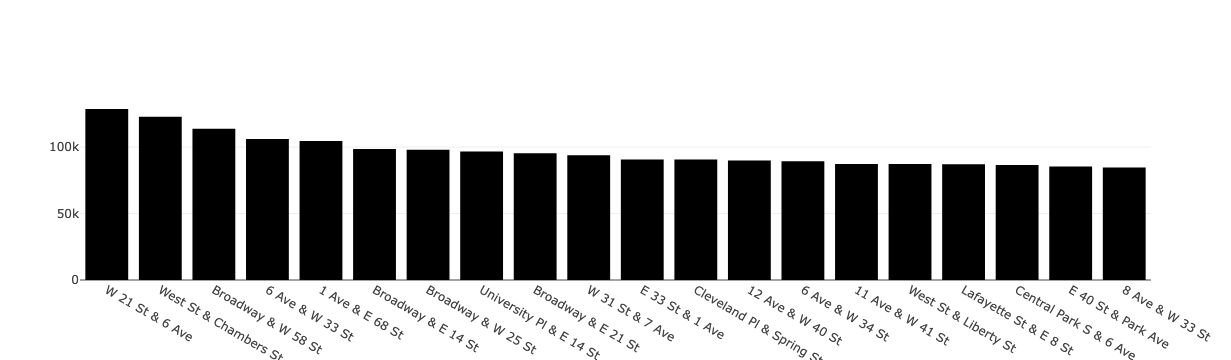

In [13]:
# Create and display a bar chart of the top 20 start stations using Plotly

fig = go.Figure(go.Bar(x = top20['start_station_name'], y = top20['value']))
fig.show()

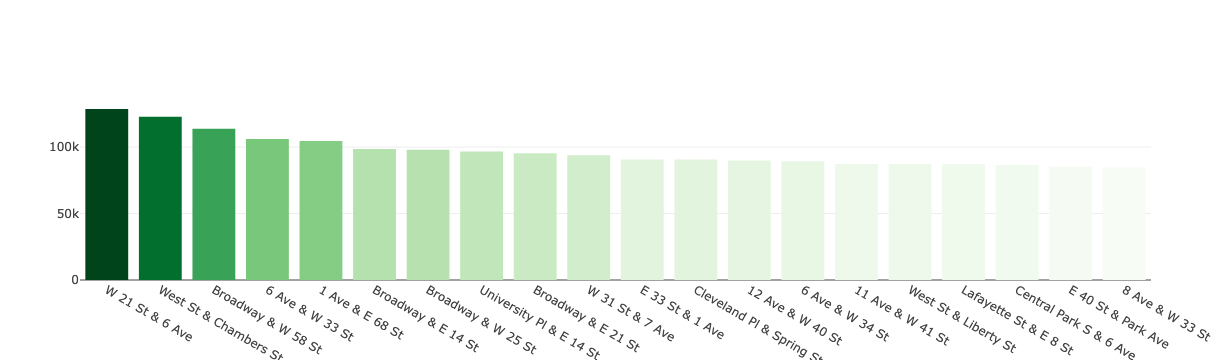

In [14]:
# Create and display a Plotly bar chart with bar colors scaled by trip counts

fig = go.Figure(go.Bar(x = top20['start_station_name'], y = top20['value'], marker={'color': top20['value'],'colorscale': 'Greens'}))
fig.show()

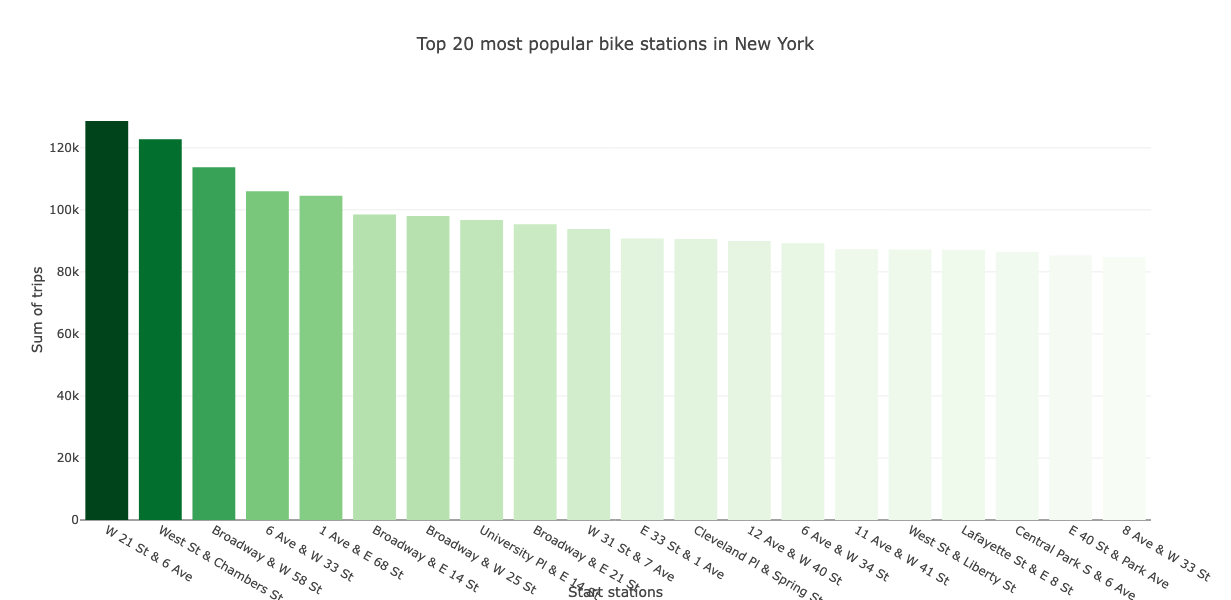

In [15]:
# Bar chart
# Update the Plotly chart layout with titles and custom dimensions

fig.update_layout(
    title = 'Top 20 most popular bike stations in New York',
    xaxis_title = 'Start stations',
    yaxis_title ='Sum of trips',
    width = 900, height = 600)

In [16]:
# Run Python’s garbage collector to free up unused memory

import gc # this is a garbage collector
gc.collect()

183

In [17]:
# Save the top 20 stations as a csv file 

top20.to_csv('top20.csv')

In [18]:
# List all column names in the dataframe

df.columns

Index(['Unnamed: 0', 'ride_id', 'bicycle_type', 'rent_start_time',
       'rent_end_time', 'start_station_name', 'start_station_id',
       'end_station_name', 'end_station_id', 'start_latitude',
       'start_longitude', 'end_latitude', 'end_longitude', 'customer_type',
       'trip_duration', 'date', 'avg_temp', 'trip_count', 'month', 'season',
       'value'],
      dtype='object')

In [19]:
# Avoid dataframe columns collapsing when showing first few rows

pd.set_option('display.max_columns', None)

In [20]:
df.head(5)

,Unnamed: 0,ride_id,bicycle_type,rent_start_time,rent_end_time,start_station_name,start_station_id,end_station_name,end_station_id,start_latitude,start_longitude,end_latitude,end_longitude,customer_type,trip_duration,date,avg_temp,trip_count,month,season,value
0,0,9D0DC440CB40CF8E,electric_bike,2022-08-27 13:56:47.728,2022-08-27 14:02:56.651,Flatbush Ave & Ocean Ave,3704.04,3 St & Prospect Park West,3865.05,40.663657,-73.963014,40.668132,-73.973638,casual,6,2022-08-27,27.8,1,8,summer,1
1,1,2214991DFBE5C4D7,electric_bike,2022-08-20 10:37:02.756,2022-08-20 10:45:56.631,Forsyth St\t& Grand St,5382.07,E 11 St & 1 Ave,5746.14,40.717798,-73.993161,40.729538,-73.984267,casual,9,2022-08-20,27.9,1,8,summer,1
2,2,20C5D469563B6337,classic_bike,2022-08-31 18:55:03.051,2022-08-31 19:03:37.344,Perry St & Bleecker St,5922.07,Grand St & Greene St,5500.02,40.735354,-74.004831,40.721700,-74.002381,member,9,2022-08-31,25.6,1,8,summer,1
3,3,3E8791885BC189D1,classic_bike,2022-08-02 08:05:00.250,2022-08-02 08:16:52.063,FDR Drive & E 35 St,6230.04,Grand Army Plaza & Central Park S,6839.1,40.744219,-73.971212,40.764397,-73.973715,member,12,2022-08-02,26.4,1,8,summer,1
4,4,8DBCBF98885106CB,electric_bike,2022-08-25 15:44:48.386,2022-08-25 15:55:39.691,E 40 St & 5 Ave,6474.11,Ave A & E 14 St,5779.11,40.752052,-73.982115,40.730311,-73.980472,member,11,2022-08-25,28.1,1,8,summer,1


In [23]:
# Making sure date is actually a real date type (not text)

df["date"] = pd.to_datetime(df["date"]).dt.date

In [24]:
# Create the daily trip count table

daily_trips = df.groupby("date").size().reset_index(name="bike_rides_daily")
daily_trips.head()

,date,bike_rides_daily
0,2022-01-01,20144
1,2022-01-02,42154
2,2022-01-03,32428
3,2022-01-04,35848
4,2022-01-05,33650


In [25]:
# Merge it back into your main dataframe

df = df.merge(daily_trips, on="date", how="left")

In [26]:
# Confirm it’s there

df.columns
df[["date", "bike_rides_daily"]].head()

,date,bike_rides_daily
0,2022-08-27,117168
1,2022-08-20,127929
2,2022-08-31,122827
3,2022-08-02,120366
4,2022-08-25,119597


In [27]:
# Extract a test date and calculate how many rows and daily rides exist for that specific date

test_date = df["date"].iloc[0]
rows_that_day = df[df["date"] == test_date].shape[0]
daily_count_that_day = df.loc[df["date"] == test_date, "bike_rides_daily"].iloc[0]

test_date, rows_that_day, daily_count_that_day

(datetime.date(2022, 8, 27), 117168, 117168)

### Reduce the row and column count

In [28]:
df.head(5)

,Unnamed: 0,ride_id,bicycle_type,rent_start_time,rent_end_time,start_station_name,start_station_id,end_station_name,end_station_id,start_latitude,start_longitude,end_latitude,end_longitude,customer_type,trip_duration,date,avg_temp,trip_count,month,season,value,bike_rides_daily
0,0,9D0DC440CB40CF8E,electric_bike,2022-08-27 13:56:47.728,2022-08-27 14:02:56.651,Flatbush Ave & Ocean Ave,3704.04,3 St & Prospect Park West,3865.05,40.663657,-73.963014,40.668132,-73.973638,casual,6,2022-08-27,27.8,1,8,summer,1,117168
1,1,2214991DFBE5C4D7,electric_bike,2022-08-20 10:37:02.756,2022-08-20 10:45:56.631,Forsyth St\t& Grand St,5382.07,E 11 St & 1 Ave,5746.14,40.717798,-73.993161,40.729538,-73.984267,casual,9,2022-08-20,27.9,1,8,summer,1,127929
2,2,20C5D469563B6337,classic_bike,2022-08-31 18:55:03.051,2022-08-31 19:03:37.344,Perry St & Bleecker St,5922.07,Grand St & Greene St,5500.02,40.735354,-74.004831,40.721700,-74.002381,member,9,2022-08-31,25.6,1,8,summer,1,122827
3,3,3E8791885BC189D1,classic_bike,2022-08-02 08:05:00.250,2022-08-02 08:16:52.063,FDR Drive & E 35 St,6230.04,Grand Army Plaza & Central Park S,6839.1,40.744219,-73.971212,40.764397,-73.973715,member,12,2022-08-02,26.4,1,8,summer,1,120366
4,4,8DBCBF98885106CB,electric_bike,2022-08-25 15:44:48.386,2022-08-25 15:55:39.691,E 40 St & 5 Ave,6474.11,Ave A & E 14 St,5779.11,40.752052,-73.982115,40.730311,-73.980472,member,11,2022-08-25,28.1,1,8,summer,1,119597


In [29]:
# Create a copy with fewer columns
# Drop unnecessary columns to create a simplified dataframe for further analysis

df_1 = df.drop(columns = {'Unnamed: 0', 'ride_id', 'bicycle_type', 'rent_start_time',
       'rent_end_time', 'start_station_id', 'end_station_id', 'start_latitude', 'start_longitude', 'end_latitude',
                          'end_longitude', 'customer_type', 'trip_duration','trip_count', 'month'})

In [30]:
df_1.head(5)

,start_station_name,end_station_name,date,avg_temp,season,value,bike_rides_daily
0,Flatbush Ave & Ocean Ave,3 St & Prospect Park West,2022-08-27,27.8,summer,1,117168
1,Forsyth St\t& Grand St,E 11 St & 1 Ave,2022-08-20,27.9,summer,1,127929
2,Perry St & Bleecker St,Grand St & Greene St,2022-08-31,25.6,summer,1,122827
3,FDR Drive & E 35 St,Grand Army Plaza & Central Park S,2022-08-02,26.4,summer,1,120366
4,E 40 St & 5 Ave,Ave A & E 14 St,2022-08-25,28.1,summer,1,119597


In [31]:
# Compare row counts per date with the daily trips column to verify they match exactly

vc = df["date"].value_counts().sort_index()
daily = daily_trips.set_index("date")["bike_rides_daily"].sort_index()

(vc.head(), daily.head(), (vc == daily).all())

(date
 2022-01-01    20144
 2022-01-02    42154
 2022-01-03    32428
 2022-01-04    35848
 2022-01-05    33650
 Name: count, dtype: int64,
 date
 2022-01-01    20144
 2022-01-02    42154
 2022-01-03    32428
 2022-01-04    35848
 2022-01-05    33650
 Name: bike_rides_daily, dtype: int64,
 True)

In [32]:
# 1) merge didn't change row count
print("Rows before:", len(df))
print("Rows after :", len(df.merge(daily_trips, on="date", how="left")))

# 2) daily totals add up to total trips
print(daily_trips["bike_rides_daily"].sum(), len(df))

# 3) no missing daily counts after merge
print(df["bike_rides_daily"].isna().sum())

Rows before: 29707810
Rows after : 29707810
29707810 29707810
0


##### Create a random split

In [33]:
# Set a random seed and create a boolean mask that selects about 99% of the rows
# Set a random seed and create a boolean mask with a 92% True probability

np.random.seed(32)
red = np.random.rand(len(df_1)) <= 0.98855

In [34]:
# Create a smaller dataframe by selecting rows not included in the boolean mask

small = df_1[~red]

In [35]:
# Display the number of rows and columns in the small dataframe

small.shape

(339030, 7)

In [36]:
small.head(5)

,start_station_name,end_station_name,date,avg_temp,season,value,bike_rides_daily
25,W 54 St & 11 Ave,W 50 St & 9 Ave,2022-08-30,26.8,summer,1,113053
127,1 Ave & E 68 St,45 Ave & 21 St,2022-08-17,23.6,summer,1,120105
354,Grand Army Plaza & Central Park S,W 51 St & Rockefeller Plaza,2022-08-25,28.1,summer,1,119597
382,E 2 St & Avenue C,Ave A & E 14 St,2022-08-28,24.6,summer,1,107300
465,Grand Army Plaza & Central Park S,Grand Army Plaza & Central Park S,2022-08-10,27.2,summer,1,123096


In [37]:
# Export the reduced dataframe to a CSV file without including the index

small.to_csv(os.path.join(path, 'CB_Data', 'Prepared Data', 'reduced_data_to_plot_small.csv'), index = False)

### The Html Map Is going to be recreated with a subset of data including only total trips higher than 750.
### I will create a separate jupyter notebook file in order to perform the required operations.

### All the rest of the task is being done in the Python File "dashboard_part_2.py"